# Simulación de Ecucaciones Diferenciales Estocásticas


## Movimiento Browniano
Se simula utilizando la propiedad de incrementos estacionarios del proceso. 

La función $\texttt{MBE(T,n)}$ simula un movimiento browniano estándar para un tiempo $\texttt{T}$, utilizando un tamaño de paso $\texttt{T/n}$.

La función $\texttt{MB(T,n,mu,sigma,x)}$ simula un movimiento browniano con media  $\texttt{mu}$, varianza  $\texttt{sigma}$ y condición inicial $\texttt{x}$.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [9]:
def MBE(T=1,N=1000):
    ran = [np.random.normal(0,T/N) for i in range(N)]
    suma = np.cumsum(ran)
    mb = np.insert(suma,0,0)
    return(mb)

def MB(mu,sigma,x,T=1,N=1000):
    ran = []
    for i in range(N):
        Z = np.random.normal(0,1)
        W = mu*(T/N) + sigma*np.sqrt(T/N)*Z
        ran.append(W)
    suma = np.cumsum(ran)+x
    mb = np.insert(suma,0,x)
    return(mb)

In [3]:
T=10
N = 10000
T_ = np.linspace(0, T, N+1)

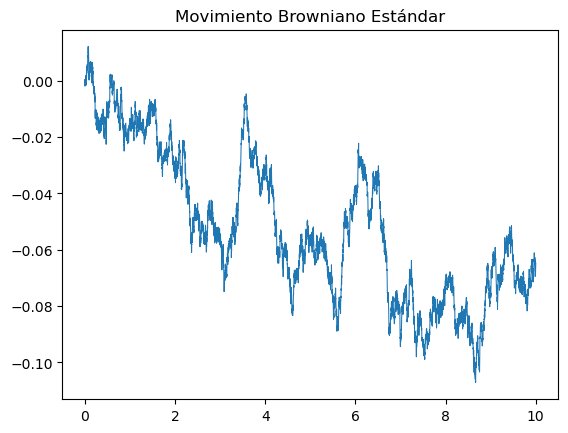

In [4]:
plt.plot(T_,MBE(T,N),linewidth = 0.75)
plt.title("Movimiento Browniano Estándar")
plt.show()

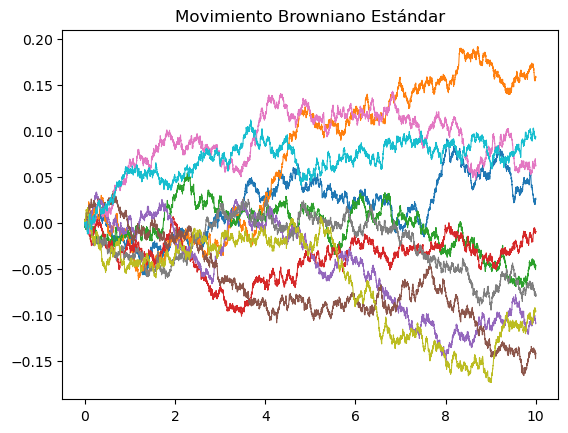

In [5]:
for _ in range(10):
    plt.plot(T_,MBE(T,N),linewidth = 0.75)
plt.title("Movimiento Browniano Estándar")
plt.show()

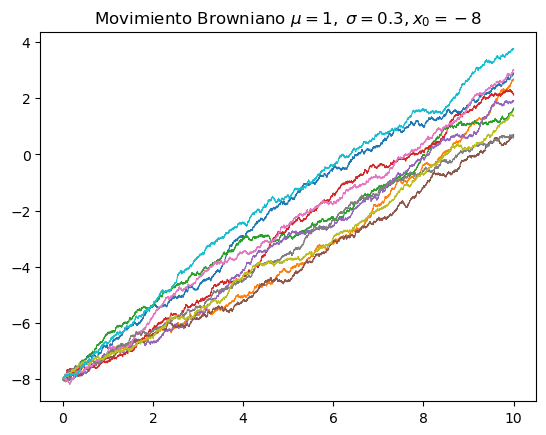

In [10]:
for _ in range(10):
    plt.plot(T_,MB(1,0.3,-8,T,N),linewidth = 0.75)
plt.title("Movimiento Browniano $\mu=1, \ \sigma = 0.3, x_0 = -8$")
plt.show()

## Movimiento Browniano Geométrico
### Milstein
La función $\texttt{MBG_milstein(mu, sigma, x0, T, N)}$ simula un movimiento browniano geométrico con coeficientes de deriva $\texttt{mu}$ y difusión $\texttt{sigma}$. Se simula utilizando el esquema de Milstein con el siguiente sistema iterativo
$$ X_{t_{i+1}} = X_{t_i}+ \mu X_{t_i}\Delta t + \sigma X_{t_i} \sqrt{\Delta t} Z + \frac{1}{2}\sigma X_{t_i}\Delta t(Z^2-1).$$
$$Z \sim N(0,1).$$

In [11]:
def MBG_milstein(mu, sigma, x0, T=1, N = 1000):
    X = [x0]
    Dt = T/N
    for i in range(1,N+1):
        Z = np.random.normal(0,1)
        Xi = X[i-1] + mu*X[i-1]*Dt + sigma*X[i-1]*np.sqrt(Dt)*Z + (1/2)*sigma*X[i-1]*Dt*(Z**2-1)
        X.append(Xi)
    return(X)

In [12]:
T=1
N = 1000
T_ = np.linspace(0, T, N+1)

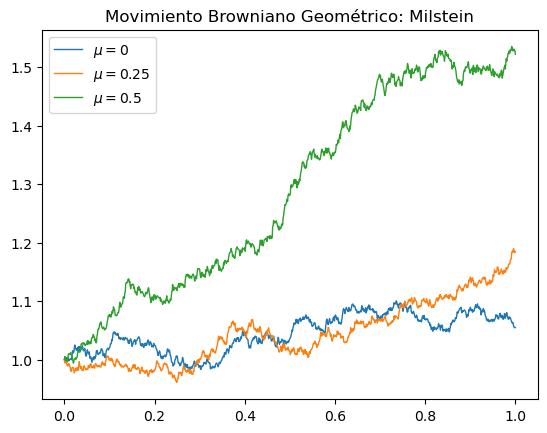

In [13]:
for mu in [0,0.25,0.5]:
    plt.plot(T_ ,MBG_milstein(mu,0.1,1), label = "$\mu=$"+str(mu),linewidth = 1)
plt.title("Movimiento Browniano Geométrico: Milstein")
plt.legend()
plt.show()

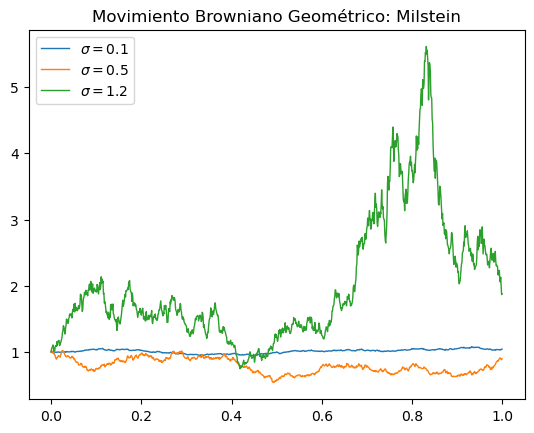

In [14]:
for sigma in [0.1,0.5,1.2]:
    plt.plot(T_ ,MBG_milstein(0,sigma,1), label = "$\sigma=$"+str(sigma), linewidth = 1)
plt.title("Movimiento Browniano Geométrico: Milstein")
plt.legend()
plt.show()

### Euler 
Al usar la transformación de Lamperti se puede simular el movimiento browniano geométrico con el esquema de Euler. Esto es lo que hace la función $\texttt{MBG_milstein(mu, sigma, x0, T, N)}$ siguiendo el sistema iterativo
$$\ln(X_{t_{i+1}}) = \ln(X_{t_i}) + \left(\mu- \frac{1}{2}\sigma^2 \right)\Delta t + \sigma \sqrt{\Delta t}Z, \ \ Z \sim N(0,1).$$
$$X_{t_{i+1}} = \exp\left( \ln(X_{t_i}) + \left(\mu- \frac{1}{2}\sigma^2 \right)\Delta t + \sigma \sqrt{\Delta t}Z \right).$$

In [15]:
def MBG_lamperti(mu, sigma, x0, T = 1,  N = 1000):
    X = [x0]
    Dt = T/N
    for i in range(1,N+1):
        Z = np.random.normal(0,1)
        Ln_Xi = math.log(X[i-1]) + (mu-0.5*sigma**2)*Dt + sigma*np.sqrt(Dt)*Z
        X.append(np.exp(Ln_Xi)) 
    return(X)

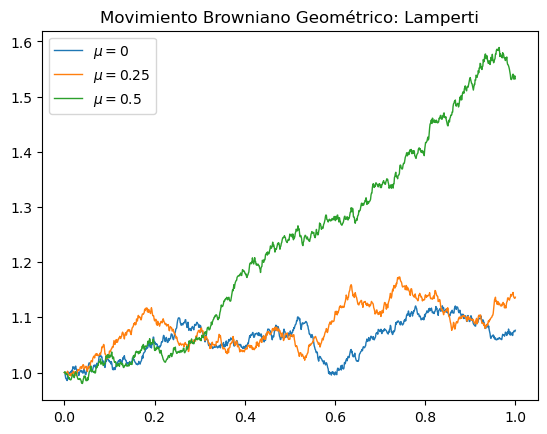

In [16]:
for mu in [0,0.25,0.5]:
    plt.plot(T_ ,MBG_lamperti(mu,0.1,1), label = "$\mu=$"+str(mu), linewidth = 1)
plt.title("Movimiento Browniano Geométrico: Lamperti")
plt.legend()
plt.show()

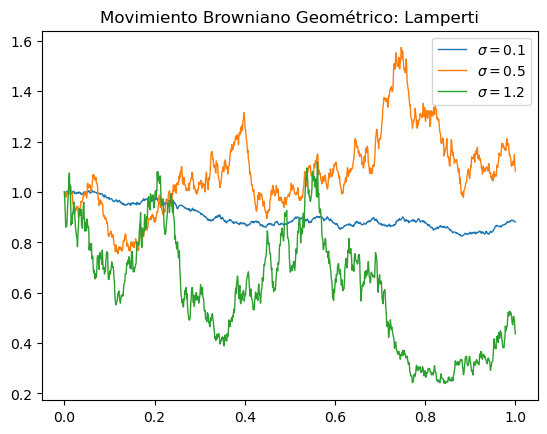

In [17]:
for sigma in [0.1,0.5,1.2]:
    plt.plot(T_ ,MBG_lamperti(0,sigma,1), label = "$\sigma=$"+str(sigma), linewidth = 1)
plt.title("Movimiento Browniano Geométrico: Lamperti")
plt.legend()
plt.show()

## Proceso de Vasicek
La función $\texttt{vasicek(a,b,sigma,x0,T,N)}$ simula el proceso de Vasicek con el esquema de Euler usando el sistema iterativo
$$X_{t_{i+1}}=X_{t_i}+a(b-X_{t_i})\Delta t + \sigma \sqrt{\Delta t}Z, \ \ Z \sim N(0,1).$$

In [18]:
def vasicek(a,b,sigma,x0,T=1,N=1000):
    X = [x0]
    Dt = T/N
    for i in range(1,N+1):
        Z = np.random.normal(0,1)
        Xi = X[i-1] + a*(b-X[i-1])*Dt + sigma*np.sqrt(Dt)*Z 
        X.append(Xi)
    return(X)

In [19]:
T=10
N = 10000
T_ = np.linspace(0, T, N+1)

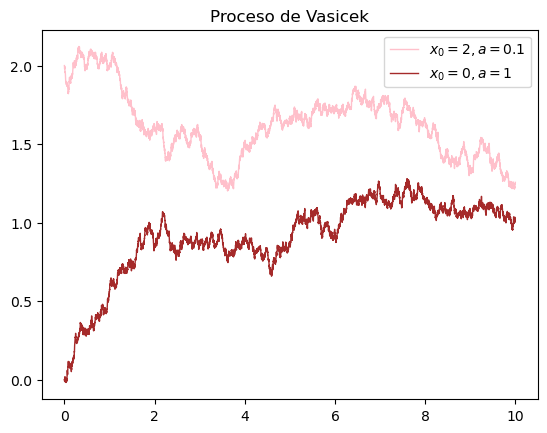

In [33]:
plt.plot(T_,vasicek(0.1,0.5,0.2,2,T,N), label = "$x_0 = 2, a = 0.1$", color = "pink",linewidth=1)
plt.plot(T_,vasicek(1,1,0.2,0,T,N), label = "$x_0 = 0, a = 1$", color = "brown",linewidth=1)
plt.title("Proceso de Vasicek")
plt.legend()
plt.show()

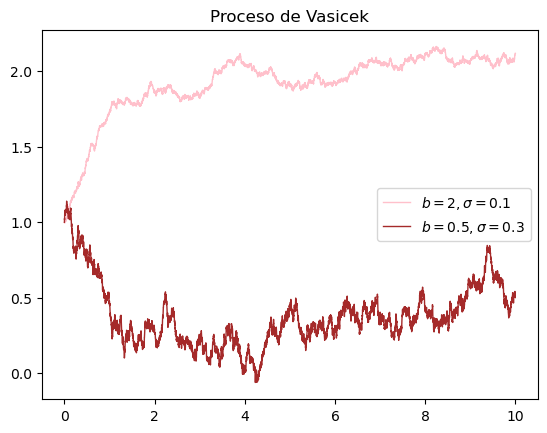

In [34]:
plt.plot(T_,vasicek(1,2,0.1,1,T,N), label = "$b = 2 , \sigma = 0.1$",color = "pink",linewidth=1)
plt.plot(T_,vasicek(1,0.5,0.3,1,T,N), label = "$b = 0.5, \sigma = 0.3$", color = "brown",linewidth=1)
plt.title("Proceso de Vasicek")
plt.legend()
plt.show()


## Puente Browniano
La función $\texttt{puente_browniano(a,b,T,N)}$ simula un puente browniano que empieza en $\texttt{a}$, termina en $\texttt{b}$. Se sigue el siguiente sistema basado en el esquema de Euler
$$X_{t_{i+1}} = X_{t_i}+\left( \frac{b-X_{t_i}}{T-t_i}\right)\Delta t + \sqrt{\Delta t} Z.$$

In [35]:
def puente_browniano(a,b,T=1,N=1000):
    X = [a]
    Dt = T/N
    for i in range(1,N+1):
        Z = np.random.normal(0,1)
        Xi = X[i-1] + ((b-X[i-1])/(T-T_[i-1]))*Dt + np.sqrt(Dt)*Z 
        X.append(Xi)
    return(X)

In [37]:
T=1
N = 1000
T_ = np.linspace(0, T, N+1)
a = 0
b = 2

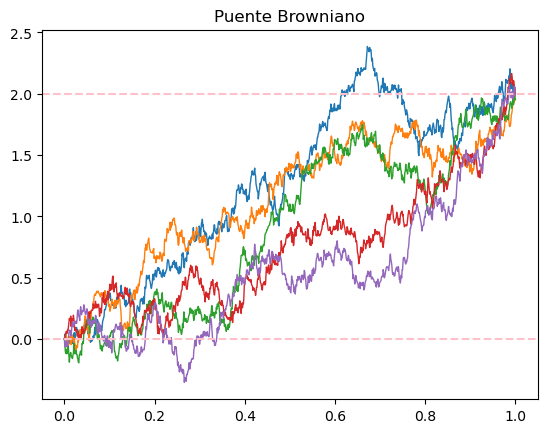

In [38]:
for _ in range(5):
    plt.plot(T_,puente_browniano(a,b),linewidth = 1)
plt.axhline(y = a,xmin = 0, xmax = T, linestyle = "--", color = "pink")
plt.axhline(y = b,xmin = 0, xmax = T, linestyle = "--", color = "pink")
plt.title("Puente Browniano")
plt.show()

## Puente de difusión
Para poder simular puentes de difusión se necesita conocer el valor $\nu$ para el cual hubo un cruce entre la trayectoria simulada a tiempo derecho con la simulada a tiempo reverso. Este valor se encuentra con la función $\texttt{cruce(X1,X2,N)}$

In [39]:
def cruce(X1,X2,N =1000):
    if (a >= b):
        l = [i for i in range(N+1) if X1[i] <= X2[i]]
        if l==[]:
            return(False)
        else:
            nu = l[0]
            return (True, nu)
    elif (a < b):
        l = [i for i in range(N+1) if X1[i] >= X2[i]]
        if l==[]:
            return(False)
        else:
            nu = l[0]
            return (True, nu)

In [40]:
def puente_vasicek(a,b,alpha,beta,sigma,T=1,N=1000):
    c = False
    while c==False:
        X1 = vasicek(alpha, beta, sigma,a,T,N)
        X2 = np.flip(vasicek(alpha, beta, sigma,b,T,N))
        if cruce(X1,X2,N) == False:
            c = False
        else:
            nu = cruce(X1,X2,N)[1]
            y1 = X1[0:nu]
            y2 = X2[nu:N+1]
            X = np.concatenate((y1,y2))
            c = True
    return(X)

In [41]:
a = 5
b = 8
T = 10
N = 10000
T_ = np.linspace(0, T, N+1)

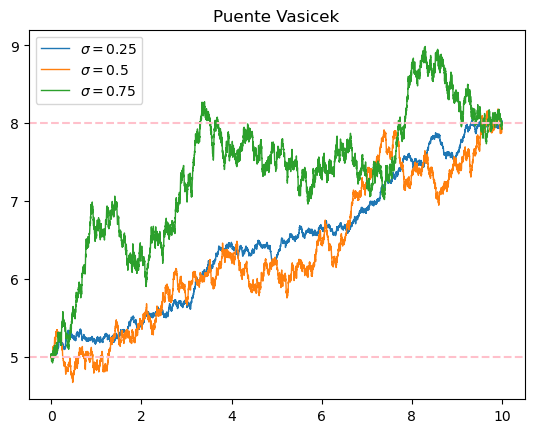

In [42]:
for sigma in [0.25,0.5,0.75] :
    plt.plot(T_,puente_vasicek(a,b,0.1,6,sigma,T,N),linewidth = 1,label = "$\sigma=$"+str(sigma))
plt.axhline(y = a,xmin = 0, xmax = T, linestyle = "--", color = "pink")
plt.axhline(y = b,xmin = 0, xmax = T, linestyle = "--", color = "pink")
plt.title("Puente Vasicek")
plt.legend()
plt.show()